# Lecture 10 Notebook - Intro to Bayesian Statistics

## Example - Proportion of Defective Items

Let's plot the prior vs the posterior.

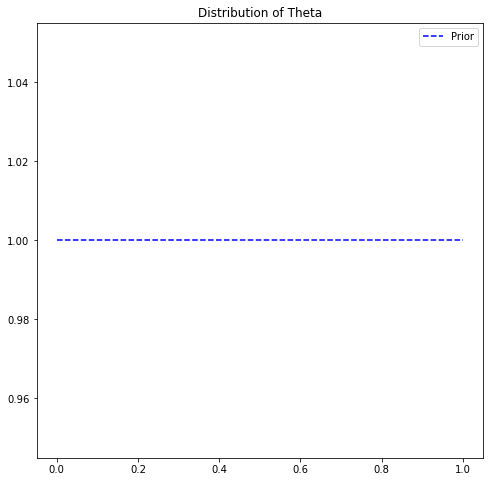

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# prior distribution
X = np.linspace(0, 1, 100) # for plotting
prior = beta.pdf(X, a = 1, b = 1)

fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Distribution of Theta')
ax.plot(X, prior, 'b--')
ax.legend(['Prior'])
plt.show()

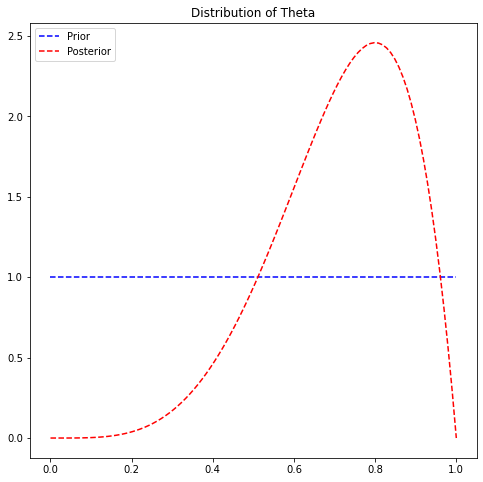

In [2]:
# observed data
x = [0, 1, 1, 1, 1]

# posterior distribution
n = len(x)
y = np.sum(x)
post = beta.pdf(X, a = y + 1, b = n - y + 1)

fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Distribution of Theta')
ax.plot(X, prior, 'b--')
ax.plot(X, post, 'r--')
ax.legend(['Prior', 'Posterior'])
plt.show()

## Example - Glove Use by Nurses

How sensitive is the posterior distribution of $\theta$ based on our choice of prior?

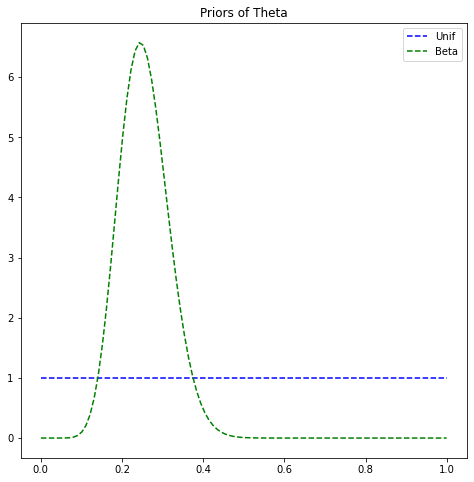

In [3]:
# X vals
X = np.linspace(0, 1, 100)

# uniform prior
prior_unif = beta.pdf(X, a = 1, b = 1)

# beta prior (try a diff prior)
# mean = 13/51 (13 out of 51 procedures)
# mean of beta is alpha / (alpha + beta)
# var is smaller compared to unif prior
prior_beta = beta.pdf(X, a = 13, b = 38)

fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Priors of Theta')
ax.plot(X, prior_unif, 'b--')
ax.plot(X, prior_beta, 'g--')
ax.legend(['Unif', 'Beta'])
plt.show()

In [4]:
print('Prior Mean of Theta (Unif Prior) =', 0.5)
print('Prior Mean of Theta (Beta Prior) =', 13/51)

Prior Mean of Theta (Unif Prior) = 0.5
Prior Mean of Theta (Beta Prior) = 0.2549019607843137


In [5]:
print('Prior Var of Theta (Unif Prior) =', 1/12)
print('Prior Var of Theta (Beta Prior) =', (13*38)/((51**2)*(52))) # variance of beta dist

Prior Var of Theta (Unif Prior) = 0.08333333333333333
Prior Var of Theta (Beta Prior) = 0.0036524413687043446


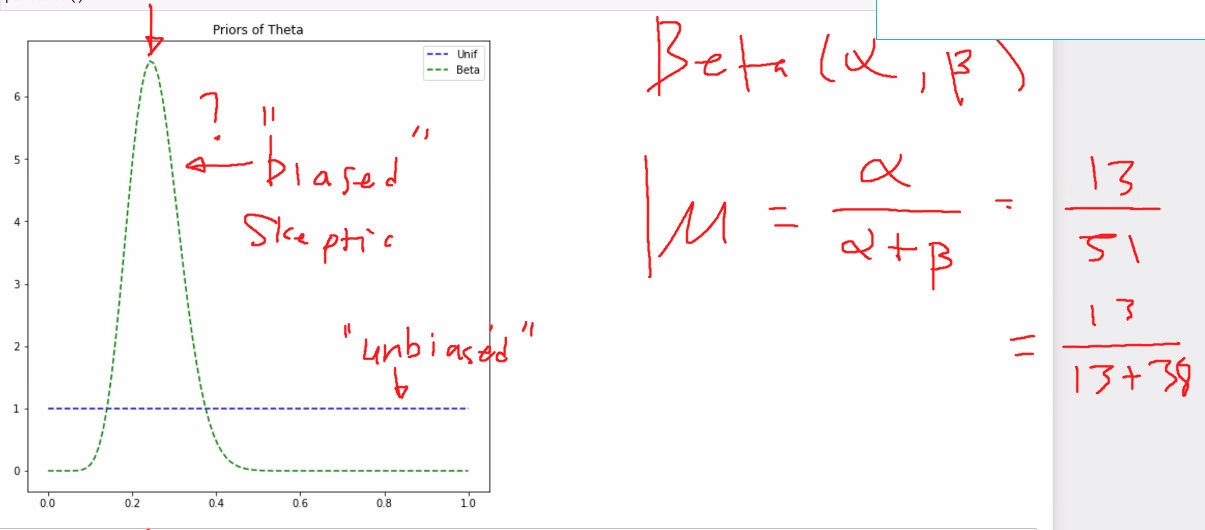

---

### How do we interpret our choice of prior?

A researcher that is "more skeptical" of the effects of the educational program would likely think that the behavior of nurses is more likely to stay the same, and so chooses the beta prior with mean at $13/51$ and a much lower variance.

On the other hand, a researcher that is more neutral in his beliefs might start out with a prior that is much more flat.

---

Two months after the educational program, 56 procedures were observed with the nurses wearing gloves in 50 of them.

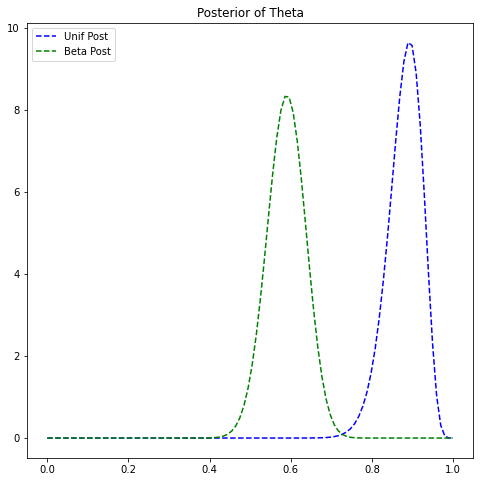

In [6]:
n = 56
y = 50

# posterior distributions
post_unif = beta.pdf(X, a = y + 1, b = n - y + 1)
post_beta = beta.pdf(X, a = y + 13, b = n - y + 38)

fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Posterior of Theta')
ax.plot(X, post_unif, 'b--')
ax.plot(X, post_beta, 'g--')
ax.legend(['Unif Post', 'Beta Post'])
plt.show()

In [13]:
print('Posterior Mean of Theta (Unif Prior) =', (y + 1)/((y + 1) + (n - y + 1)))
print('Posterior Mean of Theta (Beta Prior) =', (y + 13)/((y + 13) + (n - y + 38)))

Posterior Mean of Theta (Unif Prior) = 0.8793103448275862
Posterior Mean of Theta (Beta Prior) = 0.5887850467289719


In [14]:
print('Posterior Prob that Theta > 2*(13/51) (Unif Prior) =', 1 - beta.cdf(2*13/51, a = y + 1, b = n - y + 1))
print('Posterior Prob that Theta > 2*(13/51) (Beta Prior) =', 1 - beta.cdf(2*13/51, a = y + 13, b = n - y + 38))

Posterior Prob that Theta > 2*(13/51) (Unif Prior) = 0.9999999993181722
Posterior Prob that Theta > 2*(13/51) (Beta Prior) = 0.9502406453436202


The probability is quite high that nurses are at least twice as likely to wear gloves after the program as they were before.

Based on this rough test, it seems that even to someone who was initially skeptical, the educational program appears to have been very effective.